Lab. no. 4 
Data Science
Javier Alvarez
Elean Rivas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from wordcloud import WordCloud

# Read the data
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Convertimos el texto a minúsculas
df['text'] = df['text'].str.lower()

df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


In [6]:
def remove_special_characters(text):
    # Eliminamos caracteres como #, @ y apóstrofes
    text = re.sub(r"[#@'/-]", "", text)
    return text

def remove_urls(text):
    # Regexp para detectar URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Aplicamos la función a la columna de texto
df['text'] = df['text'].apply(remove_special_characters)
df['text'] = df['text'].apply(remove_urls)

df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,"13,000 people receive wildfires evacuation ord...",1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Función para eliminar stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Aplicamos la función a la columna de texto
df['text'] = df['text'].apply(remove_stopwords)
df.dropna(inplace=True)
df.drop("id", axis=1, inplace=True)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,keyword,location,text,target
31,ablaze,Birmingham,bbcmtd wholesale markets ablaze http:t.colhyxe...,1
32,ablaze,Est. September 2012 - Bristol,always try bring heavy. metal rt http:t.coyao1...,0
33,ablaze,AFRICA,africanbaze: breaking news:nigeria flag set ab...,1
34,ablaze,"Philadelphia, PA",crying more! set ablaze,0
35,ablaze,"London, UK",plus side look sky last night ablaze http:t.co...,0


In [8]:
disaster_tweets = df[df['target'] == 1]['text']
non_disaster_tweets = df[df['target'] == 0]['text']

# Obtiene la frecuencia de las palabras
disaster_word_freq = Counter(" ".join(disaster_tweets).split())
non_disaster_word_freq = Counter(" ".join(non_disaster_tweets).split())

# Muestra las 10 palabras más comunes en cada categoría
print(disaster_word_freq.most_common(10))
print(non_disaster_word_freq.most_common(10))

[('fire', 108), ('via', 84), ('&amp;', 74), ('police', 73), ('like', 65), ('killed', 61), ('news', 61), ('suicide', 60), ('disaster', 60), ('people', 59)]
[('im', 172), ('like', 165), ('new', 127), ('&amp;', 119), ('??', 116), ('get', 104), ('dont', 88), ('|', 75), ('one', 73), ('via', 71)]


In [9]:
disaster_tweets = df[df['target'] == 1]['text']
non_disaster_tweets = df[df['target'] == 0]['text']

# Obtenemos la frecuencia de las palabras
disaster_word_freq = Counter(" ".join(disaster_tweets).split())
non_disaster_word_freq = Counter(" ".join(non_disaster_tweets).split())

# Mostramos las 10 palabras más comunes en cada categoría
most_common_disaster_words = disaster_word_freq.most_common(10)
most_common_non_disaster_words = non_disaster_word_freq.most_common(10)

most_common_disaster_words, most_common_non_disaster_words

([('fire', 108),
  ('via', 84),
  ('&amp;', 74),
  ('police', 73),
  ('like', 65),
  ('killed', 61),
  ('news', 61),
  ('suicide', 60),
  ('disaster', 60),
  ('people', 59)],
 [('im', 172),
  ('like', 165),
  ('new', 127),
  ('&amp;', 119),
  ('??', 116),
  ('get', 104),
  ('dont', 88),
  ('|', 75),
  ('one', 73),
  ('via', 71)])

In [10]:
def create_word_cloud(word_freq):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Creamos una nube de palabras para los tweets de desastres
create_word_cloud(disaster_word_freq)

# Creamos una nube de palabras para los tweets que no son de desastres
create_word_cloud(non_disaster_word_freq)

ValueError: Only supported for TrueType fonts

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=42)

# Entrenamos un modelo de Regresión Logística
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Report: {report}')

Accuracy: 0.7795275590551181
Report:               precision    recall  f1-score   support

           0       0.78      0.85      0.81       580
           1       0.77      0.69      0.73       436

    accuracy                           0.78      1016
   macro avg       0.78      0.77      0.77      1016
weighted avg       0.78      0.78      0.78      1016



Histograma

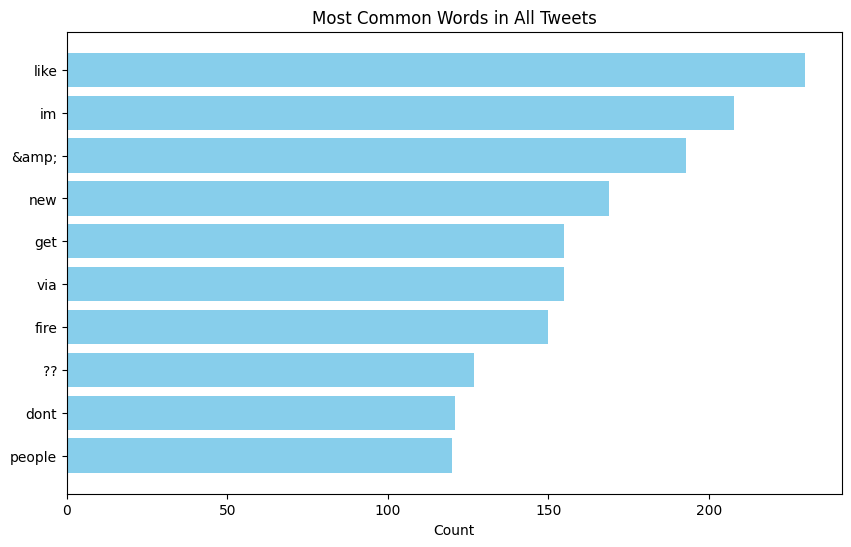

In [12]:
# Preprocess the text without removing stopwords
def preprocess_text_no_stopwords(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and URLs
    text = re.sub(r"[#@\'/-]", "", text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    return text

df['processed_text'] = df['text'].apply(preprocess_text_no_stopwords)

# Get the most common words
all_words = ' '.join(df['processed_text']).split()
common_words_all = Counter(all_words).most_common(10)

common_words_all

words, counts = zip(*common_words_all)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Count')
plt.title('Most Common Words in All Tweets')
plt.gca().invert_yaxis()
plt.show()


Elabore una función en la que el usuario ingrese un tweet y el sistema lo clasifique en desastre
o no.

In [13]:
# Separate the tweets into two groups: disaster and non-disaster
disaster_tweets = df[df['target'] == 1]['processed_text']
non_disaster_tweets = df[df['target'] == 0]['processed_text']

# Get the most common words in each group
common_words_disaster = Counter(' '.join(disaster_tweets).split()).most_common(10)
common_words_non_disaster = Counter(' '.join(non_disaster_tweets).split()).most_common(10)

common_words_disaster, common_words_non_disaster


([('fire', 108),
  ('via', 84),
  ('&amp;', 74),
  ('police', 73),
  ('like', 65),
  ('killed', 61),
  ('news', 61),
  ('suicide', 60),
  ('disaster', 60),
  ('people', 59)],
 [('im', 172),
  ('like', 165),
  ('new', 127),
  ('&amp;', 119),
  ('??', 116),
  ('get', 104),
  ('dont', 88),
  ('|', 75),
  ('one', 73),
  ('via', 71)])

In [14]:

# Vectorize the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.7795275590551181,
 '              precision    recall  f1-score   support\n\n           0       0.78      0.85      0.81       580\n           1       0.77      0.69      0.73       436\n\n    accuracy                           0.78      1016\n   macro avg       0.78      0.77      0.77      1016\nweighted avg       0.78      0.78      0.78      1016\n')

In [15]:
def classify_tweet(text):
    # Preprocess the text
    processed_text = preprocess_text_no_stopwords(text)
    # Vectorize the text
    X = vectorizer.transform([processed_text])
    # Make the prediction
    prediction = clf.predict(X)
    return "Disaster" if prediction == 1 else "Non-Disaster"

# Test the function
test_tweet = "There is a forest fire near my house"
classify_tweet(test_tweet)


'Disaster'